In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [80]:
# paths to best models:
UNET_PATH = '../u_net/v07'
CONVLSTM_PATH = '../conv_lstm/v05'
FLOWTRANS_PATH = '../flowtransformer/v07'

In [81]:
unet_test_data = pd.read_csv(f'{UNET_PATH}/test_losses.csv')
convlstm_test_data = pd.read_csv(f'{CONVLSTM_PATH}/test_losses.csv')
flowtrans_test_data = pd.read_csv(f'{FLOWTRANS_PATH}/test_losses.csv')

unet_test_data.head(5)

,Re,ts,L1 Loss,MSE Loss
0,150.0,0.50,0.103356,0.017651
1,150.0,0.55,0.104069,0.017705
2,150.0,0.60,0.104726,0.017837
3,150.0,0.65,0.105635,0.018006
4,150.0,0.70,0.105964,0.018053


In [82]:
# average l1 loss over all timesteps for every Re
unet_l1_loss_re = unet_test_data.groupby('Re').mean()['L1 Loss']
convlstm_l1_loss_re = convlstm_test_data.groupby('Re').mean()['L1 Loss']
flowtrans_l1_loss_re = flowtrans_test_data.groupby('Re').mean()['L1 Loss']

unet_l1_loss_ts = unet_test_data.groupby('ts').mean()['L1 Loss']
convlstm_l1_loss_ts = convlstm_test_data.groupby('ts').mean()['L1 Loss']
flowtrans_l1_loss_ts = flowtrans_test_data.groupby('ts').mean()['L1 Loss']

unet_l1_loss_ts

ts
0.50    0.029335
0.55    0.029036
0.60    0.028793
0.65    0.028712
0.70    0.028489
          ...   
9.70    0.031628
9.75    0.031640
9.80    0.031646
9.85    0.031672
9.90    0.031683
Name: L1 Loss, Length: 189, dtype: float64

### Averaged loss over timesteps

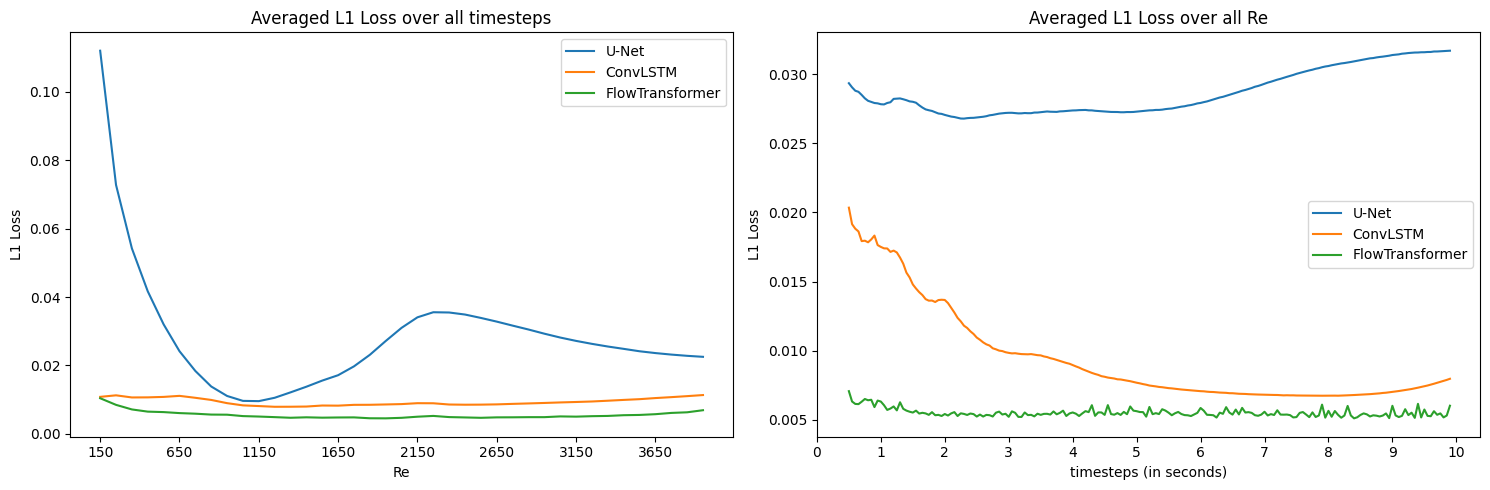

In [83]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

ax[0].plot(unet_l1_loss_re, label='U-Net')
ax[0].plot(convlstm_l1_loss_re, label='ConvLSTM')
ax[0].plot(flowtrans_l1_loss_re, label='FlowTransformer')
x_ticks = np.arange(150, 4150, 500)
ax[0].set_xticks(x_ticks)
ax[0].set_xlabel('Re')
ax[0].set_ylabel('L1 Loss')
ax[0].set_title('Averaged L1 Loss over all timesteps')
ax[0].legend()

ax[1].plot(unet_l1_loss_ts, label='U-Net')
ax[1].plot(convlstm_l1_loss_ts, label='ConvLSTM')
ax[1].plot(flowtrans_l1_loss_ts, label='FlowTransformer')
ax[1].set_xticks(np.arange(0, 11, 1))
ax[1].set_xlabel('timesteps (in seconds)')
ax[1].set_ylabel('L1 Loss')
ax[1].set_title('Averaged L1 Loss over all Re')
ax[1].legend()

plt.tight_layout()
plt.savefig('l1_loss.png')
plt.show()

# Process U and V Pipeline for Ghia Comparison

### Simulated Image vs. Ghia

In [84]:
# Ghia et al. (1982) - Re = 100
reference_ux_RE_100 = {
    128: 1.00000,
    125: 0.84123,
    124: 0.78871,
    123: 0.73722,
    122: 0.68717,
    109: 0.23151,
    94: 0.00332,
    79: -0.13641,
    64: -0.20581,
    58: -0.21090,
    36: -0.15662,
    22: -0.10150,
    13: -0.06434,
    9: -0.04775,
    8: -0.04192,
    7: -0.03717,
    0: 0.00000
}

# Ghia et al. (1982) - Re = 100
reference_uy_RE_100 = {
    128: 0.00000,
    124: -0.05906,
    123: -0.07391,
    122: -0.08864,
    121: -0.10313,
    116: -0.16914,
    110: -0.22445,
    103: -0.24533,
    64: 0.05454,
    30: 0.17527,
    29: 0.17507,
    20: 0.16077,
    12: 0.12317,
    10: 0.10890,
    9: 0.10091,
    8: 0.09233,
    0: 0.00000
}

In [85]:
import numpy as np

### Plot Original U and V

In [86]:
# read array from u_ss.txt and v_ss.txt
u = np.loadtxt('data/100.0/u_ss.txt')
v = np.loadtxt('data/100.0/v_ss.txt')

u.shape, v.shape

((128, 128), (128, 128))

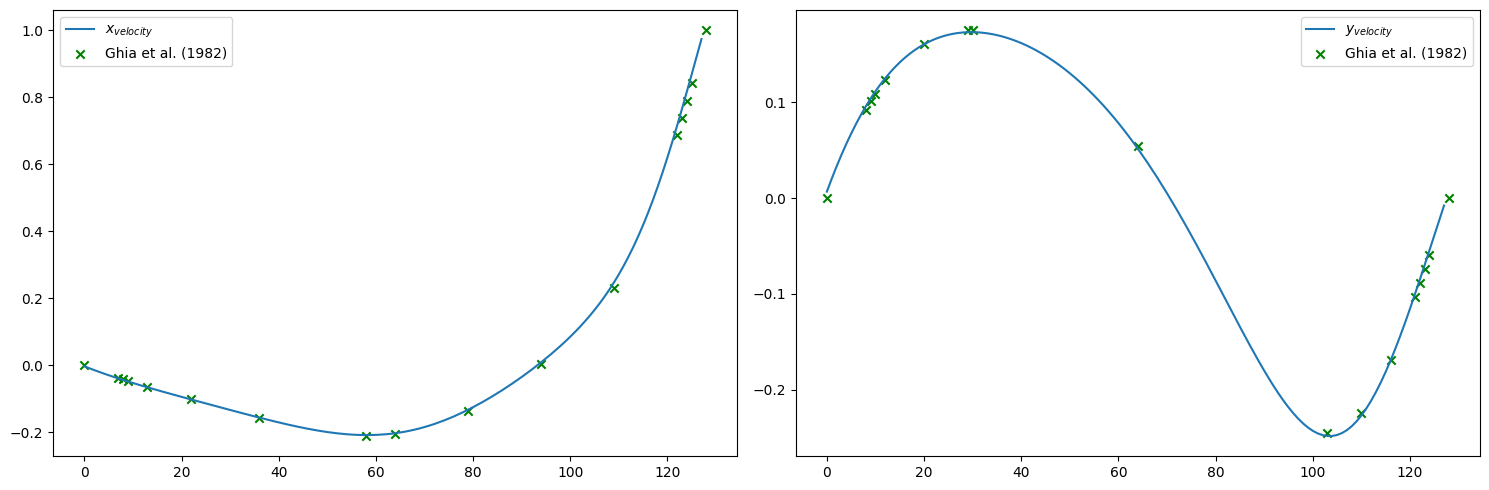

In [87]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

u_middle_line = u[:, 64][::-1]
v_middle_line = v[64, :]

ax[0].plot(u_middle_line, label='$x_{velocity}$')
ax[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[0].legend()

ax[1].plot(v_middle_line, label='$y_{velocity}$')
ax[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[1].legend()

plt.tight_layout()
plt.show()

### Plot Normalized U and V

In [88]:
normed_u = (u - u.min()) / (u.max() - u.min())
normed_v = (v - v.min()) / (v.max() - v.min())

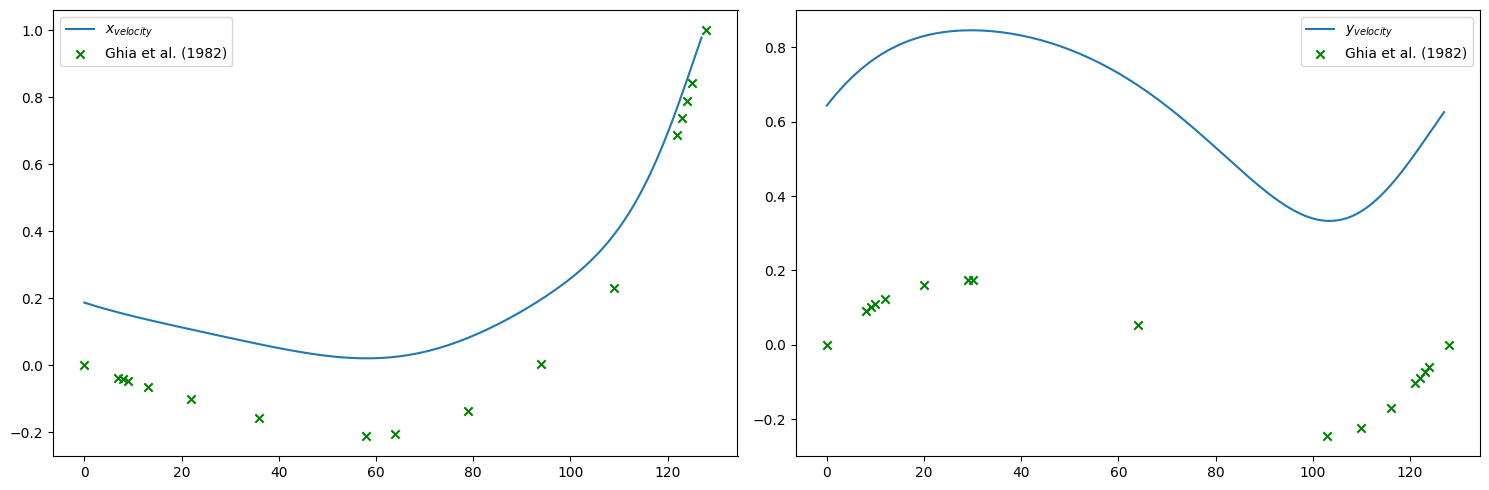

In [89]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

u_middle_line = normed_u[:, 64][::-1]
v_middle_line = normed_v[64, :]

ax[0].plot(u_middle_line, label='$x_{velocity}$')
ax[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[0].legend()

ax[1].plot(v_middle_line, label='$y_{velocity}$')
ax[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[1].legend()

plt.tight_layout()
plt.show()

### Plot Denormalized U and V

In [96]:
u_min = u.min()
u_max = u.max()
v_min = v.min()
v_max = v.max()

u_min, u_max, v_min, v_max

(-0.2339, 1.00024, -0.52269, 0.29973)

In [90]:
de_normed_u = normed_u * (u.max() - u.min()) + u.min()
de_normed_v = normed_v * (v.max() - v.min()) + v.min()

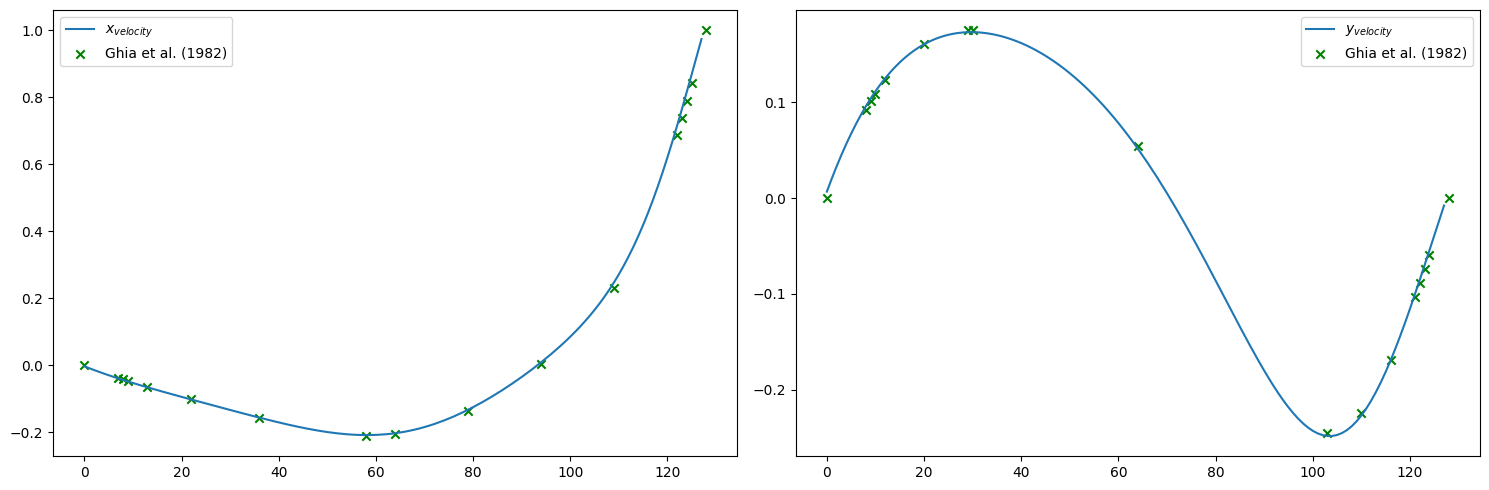

In [91]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

u_middle_line = de_normed_u[:, 64][::-1]
v_middle_line = de_normed_v[64, :]

ax[0].plot(u_middle_line, label='$x_{velocity}$')
ax[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[0].legend()

ax[1].plot(v_middle_line, label='$y_{velocity}$')
ax[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[1].legend()

plt.tight_layout()
plt.show()

### Plot Denormlized U and V from image

In [92]:
data_path = 'data/100.0/'
def open_image(path):
    return plt.imread(path)

In [93]:
u_image = open_image(data_path + 'u_ss.png')
v_image = open_image(data_path + 'v_ss.png')

u_image.shape, v_image.shape

((128, 128, 4), (128, 128, 4))

In [94]:
denormed_u_image = u_image[:, :, 0] * (u.max() - u.min()) + u.min()
denormed_v_image = v_image[:, :, 0] * (v.max() - v.min()) + v.min()

denormed_u_image.shape, denormed_v_image.shape

((128, 128), (128, 128))

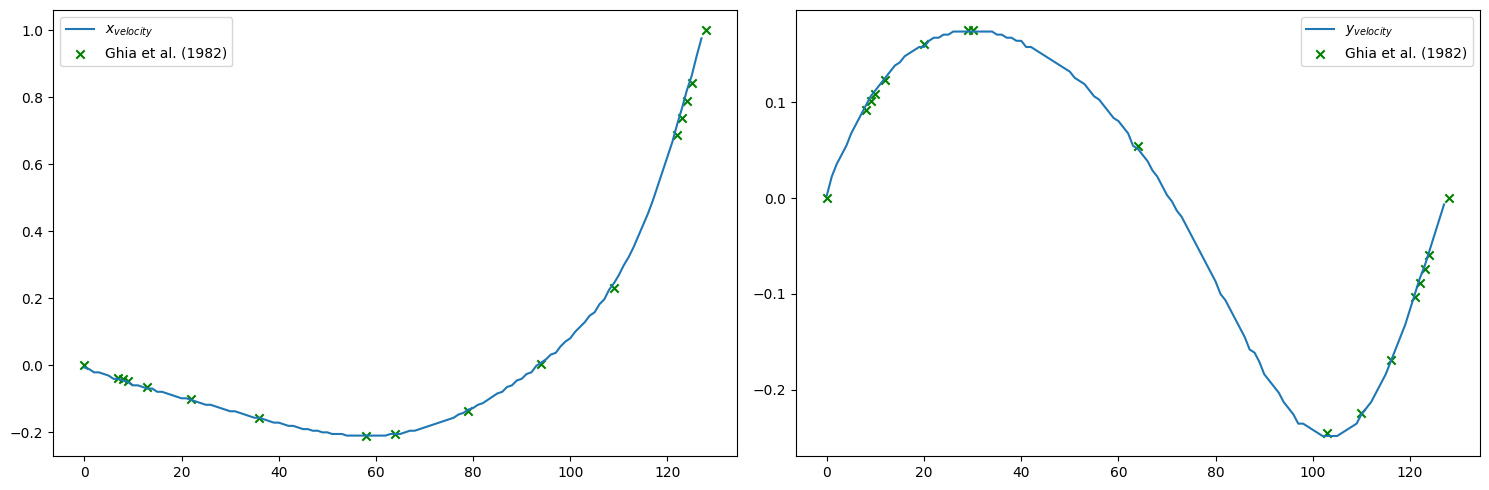

In [95]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))

u_middle_line = denormed_u_image[:, 64][::-1]
v_middle_line = denormed_v_image[64, :]

ax[0].plot(u_middle_line, label='$x_{velocity}$')
ax[0].scatter(reference_ux_RE_100.keys(), reference_ux_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[0].legend()

ax[1].plot(v_middle_line, label='$y_{velocity}$')
ax[1].scatter(reference_uy_RE_100.keys(), reference_uy_RE_100.values(), label='Ghia et al. (1982)', marker='x', color='green')
ax[1].legend()

plt.tight_layout()
plt.show()